In [454]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os

import Binary_reader

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [455]:
folder_path = "/home/torps/CommSense/Datadump/Random_Testing/7/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,0.394422-0.601917j,0.331519-0.624117j,0.267351-0.643527j,0.197973-0.658720j,0.122883-0.670041j,0.046841-0.679263j,-0.025393-0.688158j,-0.089060-0.698501j,-0.139400-0.712063j,-0.175692-0.730433j,...,-0.078431-0.017853j,-0.064751-0.041549j,-0.049006-0.068904j,-0.033623-0.096987j,-0.021031-0.122864j,-0.013657-0.143602j,-0.013141-0.159897j,-0.017727-0.175205j,-0.024746-0.190736j,1
1,0.306874-0.498939j,0.244338-0.521948j,0.178284-0.543261j,0.109041-0.564452j,0.037617-0.581233j,-0.034442-0.595009j,-0.102227-0.608244j,-0.159440-0.622771j,-0.197796-0.648585j,-0.227017-0.689536j,...,-0.080310-0.028633j,-0.066817-0.052945j,-0.051541-0.079499j,-0.036914-0.106007j,-0.026212-0.127892j,-0.023665-0.139304j,-0.025101-0.149969j,-0.030562-0.162087j,-0.038687-0.174679j,1
2,0.218485-0.394108j,0.154686-0.417789j,0.084528-0.441051j,0.014693-0.464483j,-0.052206-0.487462j,-0.118434-0.505762j,-0.178333-0.522581j,-0.221426-0.545386j,-0.247824-0.591732j,-0.268302-0.645232j,...,-0.078661-0.043285j,-0.065599-0.069296j,-0.051739-0.094273j,-0.039783-0.115808j,-0.035058-0.126673j,-0.036945-0.131073j,-0.040895-0.135219j,-0.045422-0.143416j,-0.052743-0.153509j,1
3,0.129430-0.288817j,0.060488-0.312842j,-0.010391-0.336814j,-0.078518-0.360902j,-0.140846-0.385309j,-0.198020-0.408266j,-0.245480-0.430046j,-0.274101-0.474563j,-0.292305-0.531730j,-0.306532-0.589321j,...,-0.076976-0.057160j,-0.064717-0.080221j,-0.053949-0.101462j,-0.047055-0.114586j,-0.047725-0.118526j,-0.051944-0.118817j,-0.057155-0.118790j,-0.061524-0.121816j,-0.065587-0.130053j,1
4,0.038721-0.183845j,-0.029672-0.207102j,-0.098065-0.230359j,-0.163155-0.253719j,-0.221640-0.277283j,-0.270217-0.301155j,-0.304467-0.336057j,-0.325425-0.386944j,-0.337969-0.445271j,-0.346977-0.502490j,...,-0.079003-0.060877j,-0.067614-0.081240j,-0.059994-0.096134j,-0.057778-0.103283j,-0.060057-0.104391j,-0.064957-0.102314j,-0.070606-0.099903j,-0.075133-0.100012j,-0.076663-0.105494j,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,-0.049180-0.026181j,-0.044139-0.021848j,-0.040037-0.017280j,-0.038219-0.014060j,-0.038910-0.012171j,-0.040694-0.011214j,-0.042853-0.011888j,-0.044918-0.012779j,-0.046434-0.013347j,-0.046435-0.013135j,...,0.022194-0.045107j,0.020948-0.045193j,0.019851-0.045854j,0.019065-0.046971j,0.017719-0.047722j,0.015786-0.047230j,0.013041-0.043784j,0.009681-0.037968j,0.006142-0.031296j,0
1410,-0.059361-0.022319j,-0.053619-0.016207j,-0.048655-0.010170j,-0.045254-0.005370j,-0.044500-0.002648j,-0.045461-0.001908j,-0.046883-0.002051j,-0.048737-0.002588j,-0.050603-0.003286j,-0.051683-0.003584j,...,0.010859-0.052299j,0.009669-0.051520j,0.008945-0.052320j,0.007937-0.053538j,0.006520-0.054767j,0.004762-0.055372j,0.002565-0.054302j,-0.000329-0.050182j,-0.003328-0.044894j,0
1411,-0.067882-0.016904j,-0.061700-0.009813j,-0.056257-0.002868j,-0.052174+0.002854j,-0.050071+0.006274j,-0.049920+0.007601j,-0.050935+0.007985j,-0.052604+0.007762j,-0.054412+0.007270j,-0.055847+0.006844j,...,-0.001160-0.059588j,-0.001548-0.058962j,-0.002325-0.059419j,-0.003368-0.060818j,-0.004687-0.062446j,-0.006290-0.063592j,-0.008189-0.063542j,-0.010393-0.061583j,-0.012990-0.057471j,0
1412,-0.069176-0.004407j,-0.062740+0.003180j,-0.057550+0.010027j,-0.054940+0.014190j,-0.055310+0.014994j,-0.056018+0.015403j,-0.056835+0.015877j,-0.058318+0.015884j,-0.059915+0.015709j,-0.060989+0.015894j,...,-0.012694-0.068113j,-0.012917-0.067502j,-0.013620-0.067262j,-0.014627-0.068229j,-0.015799-0.069908j,-0.017212-0.071287j,-0.018813-0.071905j,-0.020621-0.071499j,-0.022705-0.069831j,0


In [456]:
stats = complete_data.describe().transpose()
stats.tail(10)

,count,mean,std,min,25%,50%,75%,max
591,1414.0+ 0.0j,0.061839-0.067036j,0.962672+0.000000j,-1.947256+0.160783j,-0.081900+0.148789j,0.007882+0.060444j,0.179079+0.268085j,1.831517+0.187449j
592,1414.0+ 0.0j,0.061026-0.066923j,0.961012+0.000000j,-1.952270+0.096065j,-0.086548-0.071030j,0.008517-0.769804j,0.174397-1.089221j,1.815136+0.245657j
593,1414.0+ 0.0j,0.060147-0.066998j,0.959236+0.000000j,-1.945590+0.029004j,-0.086858-0.057935j,0.010410-0.010057j,0.175121+1.133278j,1.787235+0.296902j
594,1414.0+ 0.0j,0.059211-0.067067j,0.957910+0.000000j,-1.935834-0.036595j,-0.087166-0.397401j,0.011457+0.009284j,0.172003-0.151161j,1.758482+0.344105j
595,1414.0+ 0.0j,0.058344-0.066974j,0.957888+0.000000j,-1.931622-0.096928j,-0.087740-0.043033j,0.011485-0.742831j,0.168015-1.140886j,1.739547+0.390189j
596,1414.0+ 0.0j,0.057655-0.066655j,0.959273+0.000000j,-1.941571-0.148189j,-0.089248-0.021980j,0.010611-0.042071j,0.166037-0.573278j,1.741099+0.438077j
597,1414.0+ 0.0j,0.057241-0.066025j,0.962208+0.000000j,-1.969512-0.187776j,-0.089525+0.007659j,0.010751-0.001454j,0.169841-0.157613j,1.770152+0.487947j
598,1414.0+ 0.0j,0.057182-0.064956j,0.967399+0.000000j,-2.010718-0.218273j,-0.089091-0.006520j,0.009437+0.041454j,0.168239-0.466797j,1.820945+0.537946j
599,1414.0+ 0.0j,0.057426-0.063463j,0.975179+0.000000j,-2.060975-0.243658j,-0.087971-0.006682j,0.008158+0.012133j,0.175128-0.276099j,1.884980+0.587950j
Target,1414.0+ 0.0j,1.693069+0.000000j,1.132669+0.000000j,0.000000+0.000000j,1.000000+0.000000j,1.000000+0.000000j,3.000000+0.000000j,3.000000+0.000000j


In [457]:

def norm(x):
    return (x-stats['min'])/ (stats['max'] - stats['min'])



# # Bad Normalization method below results in the loss of magnitude information as it divides by magnitude to standardize to the unit circle

    # def normalize_complex_dataframe(df):          
    #     df = df.copy()  # Avoid modifying the original DataFrame
    #     magnitudes = np.abs(df)  # Compute magnitudes
        
    #     # Normalize each complex number (avoid division by zero)
    #     df[magnitudes != 0] = df[magnitudes != 0] / magnitudes[magnitudes != 0]
        
    #     return df


In [458]:

# norm_data = norm(complete_data)
norm_data = complete_data
# norm_data = norm_data.sample(frac=1)

norm_abs_data = norm_data.map(np.abs)
# norm_abs_data = norm_data


# Separating out the target
y = norm_data.loc[:, ['Target']].values

y_labels = np.where(y == 0, "white_lab", np.where(y==1, "CRG_lab", np.where(y==2, "Other", "Rory")))

# if y== 0:
#     y_labels = 'white_lab'
# else:
#     y_labels = 'CRG'


lab = pd.DataFrame(y_labels,columns=['Target'])
dataset_0 = norm_data[norm_data['Target'] == 0]
dataset_1 = norm_data[norm_data['Target'] == 1]
Targets = norm_data.pop('Target')
# Generate feature names as strings from "0" to "599"
features = list(range(600))

# Separating out the features
# x = norm_data.iloc[:, features].values  # Extracting feature values
x =norm_data
norm_data
# lab.head()
# out = pd.DataFrame(x,columns=x.columns, index=x.index)
# out.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.394422-0.601917j,0.331519-0.624117j,0.267351-0.643527j,0.197973-0.658720j,0.122883-0.670041j,0.046841-0.679263j,-0.025393-0.688158j,-0.089060-0.698501j,-0.139400-0.712063j,-0.175692-0.730433j,...,-0.087617-0.000750j,-0.078431-0.017853j,-0.064751-0.041549j,-0.049006-0.068904j,-0.033623-0.096987j,-0.021031-0.122864j,-0.013657-0.143602j,-0.013141-0.159897j,-0.017727-0.175205j,-0.024746-0.190736j
1,0.306874-0.498939j,0.244338-0.521948j,0.178284-0.543261j,0.109041-0.564452j,0.037617-0.581233j,-0.034442-0.595009j,-0.102227-0.608244j,-0.159440-0.622771j,-0.197796-0.648585j,-0.227017-0.689536j,...,-0.091445-0.006637j,-0.080310-0.028633j,-0.066817-0.052945j,-0.051541-0.079499j,-0.036914-0.106007j,-0.026212-0.127892j,-0.023665-0.139304j,-0.025101-0.149969j,-0.030562-0.162087j,-0.038687-0.174679j
2,0.218485-0.394108j,0.154686-0.417789j,0.084528-0.441051j,0.014693-0.464483j,-0.052206-0.487462j,-0.118434-0.505762j,-0.178333-0.522581j,-0.221426-0.545386j,-0.247824-0.591732j,-0.268302-0.645232j,...,-0.091863-0.018888j,-0.078661-0.043285j,-0.065599-0.069296j,-0.051739-0.094273j,-0.039783-0.115808j,-0.035058-0.126673j,-0.036945-0.131073j,-0.040895-0.135219j,-0.045422-0.143416j,-0.052743-0.153509j
3,0.129430-0.288817j,0.060488-0.312842j,-0.010391-0.336814j,-0.078518-0.360902j,-0.140846-0.385309j,-0.198020-0.408266j,-0.245480-0.430046j,-0.274101-0.474563j,-0.292305-0.531730j,-0.306532-0.589321j,...,-0.090682-0.032989j,-0.076976-0.057160j,-0.064717-0.080221j,-0.053949-0.101462j,-0.047055-0.114586j,-0.047725-0.118526j,-0.051944-0.118817j,-0.057155-0.118790j,-0.061524-0.121816j,-0.065587-0.130053j
4,0.038721-0.183845j,-0.029672-0.207102j,-0.098065-0.230359j,-0.163155-0.253719j,-0.221640-0.277283j,-0.270217-0.301155j,-0.304467-0.336057j,-0.325425-0.386944j,-0.337969-0.445271j,-0.346977-0.502490j,...,-0.092215-0.038170j,-0.079003-0.060877j,-0.067614-0.081240j,-0.059994-0.096134j,-0.057778-0.103283j,-0.060057-0.104391j,-0.064957-0.102314j,-0.070606-0.099903j,-0.075133-0.100012j,-0.076663-0.105494j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,-0.049180-0.026181j,-0.044139-0.021848j,-0.040037-0.017280j,-0.038219-0.014060j,-0.038910-0.012171j,-0.040694-0.011214j,-0.042853-0.011888j,-0.044918-0.012779j,-0.046434-0.013347j,-0.046435-0.013135j,...,0.023471-0.046568j,0.022194-0.045107j,0.020948-0.045193j,0.019851-0.045854j,0.019065-0.046971j,0.017719-0.047722j,0.015786-0.047230j,0.013041-0.043784j,0.009681-0.037968j,0.006142-0.031296j
1410,-0.059361-0.022319j,-0.053619-0.016207j,-0.048655-0.010170j,-0.045254-0.005370j,-0.044500-0.002648j,-0.045461-0.001908j,-0.046883-0.002051j,-0.048737-0.002588j,-0.050603-0.003286j,-0.051683-0.003584j,...,0.011219-0.053655j,0.010859-0.052299j,0.009669-0.051520j,0.008945-0.052320j,0.007937-0.053538j,0.006520-0.054767j,0.004762-0.055372j,0.002565-0.054302j,-0.000329-0.050182j,-0.003328-0.044894j
1411,-0.067882-0.016904j,-0.061700-0.009813j,-0.056257-0.002868j,-0.052174+0.002854j,-0.050071+0.006274j,-0.049920+0.007601j,-0.050935+0.007985j,-0.052604+0.007762j,-0.054412+0.007270j,-0.055847+0.006844j,...,-0.001202-0.060762j,-0.001160-0.059588j,-0.001548-0.058962j,-0.002325-0.059419j,-0.003368-0.060818j,-0.004687-0.062446j,-0.006290-0.063592j,-0.008189-0.063542j,-0.010393-0.061583j,-0.012990-0.057471j
1412,-0.069176-0.004407j,-0.062740+0.003180j,-0.057550+0.010027j,-0.054940+0.014190j,-0.055310+0.014994j,-0.056018+0.015403j,-0.056835+0.015877j,-0.058318+0.015884j,-0.059915+0.015709j,-0.060989+0.015894j,...,-0.012835-0.069190j,-0.012694-0.068113j,-0.012917-0.067502j,-0.013620-0.067262j,-0.014627-0.068229j,-0.015799-0.069908j,-0.017212-0.071287j,-0.018813-0.071905j,-0.020621-0.071499j,-0.022705-0.069831j


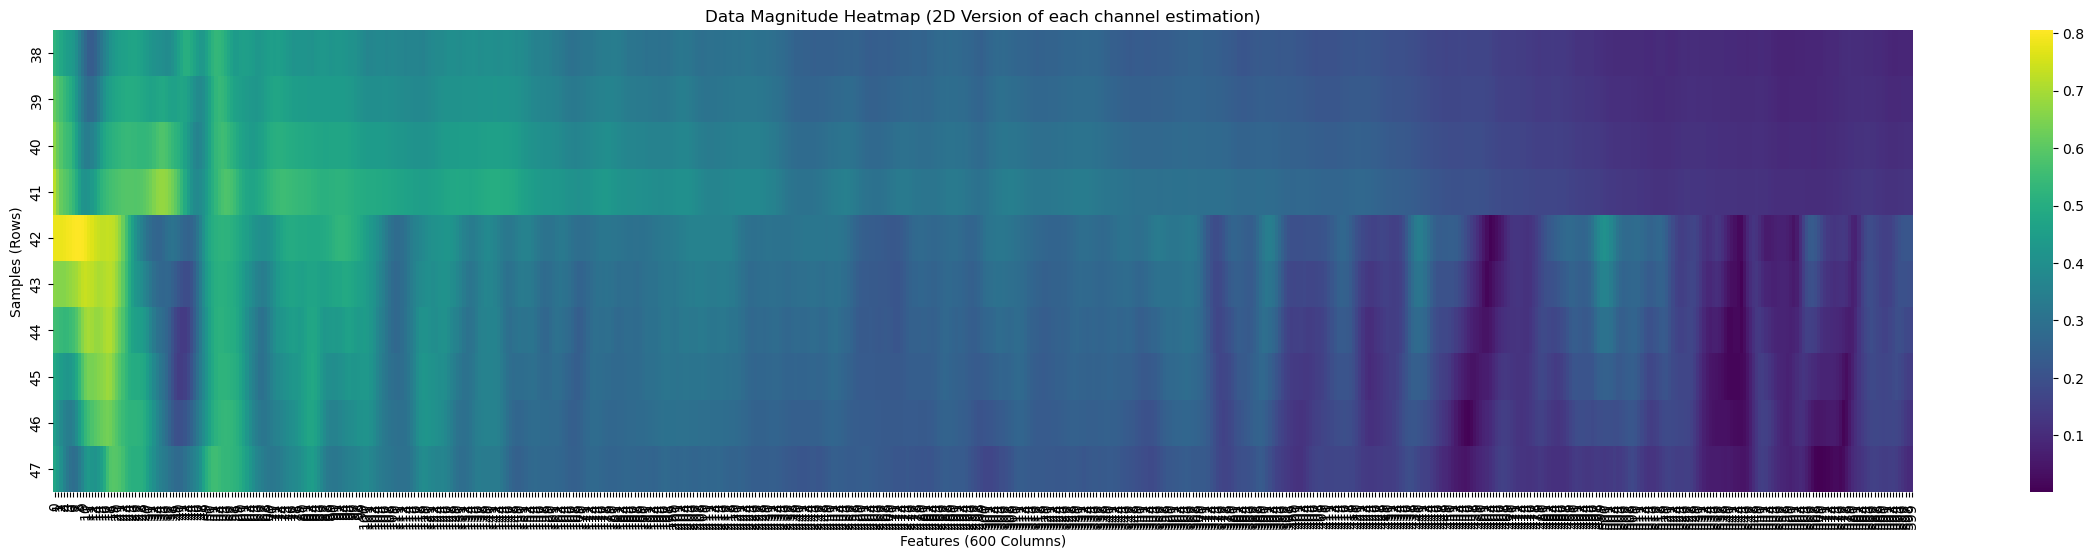

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
38,0.522630,0.498817,0.479192,0.461939,0.446799,0.438186,0.428329,0.394570,0.350568,0.307091,...,0.092773,0.090035,0.087449,0.085450,0.085494,0.086386,0.087561,0.088471,0.088150,0.085353
39,0.614425,0.587874,0.563583,0.541025,0.519263,0.497078,0.466229,0.423929,0.377101,0.332700,...,0.099154,0.096458,0.094229,0.092856,0.092874,0.094106,0.095877,0.097501,0.098284,0.097532
40,0.664748,0.617651,0.586175,0.561609,0.550512,0.539661,0.506652,0.459209,0.411545,0.368683,...,0.108308,0.105723,0.103844,0.103229,0.103618,0.105180,0.107357,0.109373,0.110457,0.110358
41,0.721249,0.661044,0.614183,0.595435,0.582846,0.561155,0.535531,0.497947,0.450729,0.417158,...,0.118341,0.116365,0.115578,0.115654,0.116282,0.117489,0.119414,0.121198,0.122314,0.123071
42,0.781029,0.781462,0.783156,0.786301,0.790830,0.795948,0.800873,0.804543,0.805512,0.800931,...,0.152523,0.152117,0.157630,0.169471,0.185338,0.201072,0.211908,0.215663,0.215453,0.214539
43,0.661094,0.657652,0.655782,0.656659,0.664183,0.674245,0.684789,0.695026,0.711699,0.732884,...,0.154965,0.154920,0.161341,0.173327,0.188289,0.200470,0.201966,0.200665,0.197430,0.193278
44,0.558497,0.548098,0.538579,0.533460,0.536928,0.548514,0.563210,0.583469,0.620221,0.660260,...,0.160409,0.160402,0.168001,0.179904,0.191354,0.193249,0.187061,0.179516,0.174406,0.168772
45,0.484303,0.462774,0.443002,0.428825,0.423737,0.431347,0.447656,0.482974,0.530498,0.579575,...,0.167045,0.167748,0.172268,0.181123,0.184995,0.178972,0.168413,0.157055,0.148439,0.143702
46,0.447825,0.414939,0.383366,0.357537,0.341464,0.338537,0.356038,0.393331,0.441376,0.491159,...,0.167170,0.168006,0.170651,0.173005,0.170407,0.161534,0.148967,0.135609,0.124618,0.119473
47,0.472645,0.440883,0.400360,0.361436,0.325222,0.298166,0.288527,0.302651,0.333401,0.371382,...,0.143931,0.143376,0.147644,0.150782,0.144763,0.132631,0.119572,0.106636,0.098391,0.097325


In [459]:
# Set up the figure
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
comp_abs_data = complete_data.map(np.abs)

sub_set = comp_abs_data.iloc[38:48,:]
# Create the heatmap
sns.heatmap(sub_set, cmap='viridis', xticklabels=True, yticklabels=True, cbar=True)

# Labels and title
plt.xlabel("Features (600 Columns)")
plt.ylabel("Samples (Rows)")
plt.title("Data Magnitude Heatmap (2D Version of each channel estimation)")

# Show the plot
plt.show()
# comp_abs_data.head(10)
sub_set

In [460]:

x = np.abs(x)
testDF = pd.DataFrame(data=x)
testDF

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.719633,0.706702,0.696852,0.687827,0.681216,0.680876,0.688626,0.704155,0.725580,0.751265,...,0.087621,0.080437,0.076935,0.084554,0.102650,0.124651,0.144250,0.160436,0.176099,0.192334
1,0.585757,0.576308,0.571767,0.574888,0.582450,0.596005,0.616774,0.642856,0.678075,0.725945,...,0.091685,0.085261,0.085251,0.094745,0.112250,0.130551,0.141300,0.152055,0.164943,0.178912
2,0.450618,0.445506,0.449078,0.464715,0.490250,0.519444,0.552172,0.588622,0.641532,0.698792,...,0.093785,0.089784,0.095421,0.107538,0.122451,0.131435,0.136181,0.141268,0.150437,0.162317
3,0.316492,0.318636,0.336974,0.369344,0.410245,0.453754,0.495177,0.548034,0.606778,0.664275,...,0.096496,0.095878,0.103071,0.114913,0.123872,0.127773,0.129675,0.131825,0.136471,0.145655
4,0.187878,0.209217,0.250364,0.301650,0.354979,0.404613,0.453469,0.505596,0.559007,0.610647,...,0.099802,0.099737,0.105696,0.113319,0.118345,0.120434,0.121192,0.122335,0.125089,0.130408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.055715,0.049250,0.043607,0.040723,0.040769,0.042211,0.044471,0.046700,0.048314,0.048257,...,0.052148,0.050271,0.049812,0.049966,0.050693,0.050905,0.049799,0.045685,0.039183,0.031893
1410,0.063418,0.056015,0.049707,0.045571,0.044579,0.045501,0.046928,0.048805,0.050709,0.051807,...,0.054815,0.053415,0.052419,0.053079,0.054123,0.055153,0.055576,0.054363,0.050183,0.045017
1411,0.069955,0.062475,0.056330,0.052252,0.050463,0.050496,0.051558,0.053174,0.054896,0.056265,...,0.060774,0.059599,0.058983,0.059464,0.060911,0.062622,0.063902,0.064067,0.062454,0.058920
1412,0.069316,0.062820,0.058417,0.056743,0.057306,0.058098,0.059011,0.060443,0.061940,0.063027,...,0.070371,0.069286,0.068726,0.068627,0.069779,0.071671,0.073335,0.074325,0.074413,0.073430


In [461]:


pca = PCA(n_components=600)

principalComponents = pca.fit_transform(x)

arr = [str(i) for i in range(3, 601)]
labels = ['principal component 1', 'principal component 2']

labels = labels + arr

principalDf = pd.DataFrame(data = principalComponents
             , columns = labels)

finalDf = pd.concat([principalDf, lab], axis = 1)

finalDf.tail(20)



,principal component 1,principal component 2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Target
1394,-10.814843,-3.720719,-0.390082,0.062087,0.007809,0.171787,0.094654,0.048972,-0.080176,-0.055308,...,-9.062627e-06,4.866484e-06,-0.000004,1.467177e-05,-0.000002,6.303507e-07,-0.000027,2.393674e-05,2.712277e-05,white_lab
1395,-10.717491,-3.661483,-0.347715,0.077216,0.021654,0.173357,0.082862,0.054843,-0.073263,-0.062237,...,-2.946932e-05,3.622803e-05,-0.000017,-2.120936e-05,0.000004,-3.445134e-05,0.000025,-2.260453e-05,-1.587423e-05,white_lab
1396,-10.568785,-3.569151,-0.272883,0.096193,0.041250,0.173755,0.075497,0.054514,-0.063311,-0.068219,...,1.400654e-05,-4.475692e-05,0.000037,-3.006262e-06,-0.000005,1.436161e-05,0.000045,-1.906669e-05,-6.457396e-06,white_lab
1397,-10.354395,-3.434156,-0.151668,0.117790,0.065720,0.175014,0.076565,0.051184,-0.052820,-0.073544,...,-6.377560e-07,-1.023043e-05,0.000005,1.224576e-06,-0.000009,1.872501e-05,0.000016,2.838941e-06,-1.855593e-05,white_lab
1398,-10.071991,-3.254574,0.023176,0.146916,0.094600,0.172471,0.091454,0.045215,-0.041155,-0.080604,...,1.983040e-05,4.315866e-05,0.000013,-4.946415e-05,-0.000013,3.166822e-05,-0.000001,-2.783911e-05,-7.442528e-06,white_lab
1399,-9.763398,-3.057040,0.218471,0.176817,0.123746,0.170354,0.110252,0.039729,-0.031977,-0.087807,...,-2.416634e-05,-5.764789e-06,-0.000001,3.580410e-05,0.000002,6.292439e-06,0.000005,-1.554647e-05,-1.088842e-05,white_lab
1400,-10.411123,-3.559347,-0.079823,0.088150,0.099249,0.200578,0.148219,0.026720,-0.000159,-0.114757,...,1.631373e-05,4.142093e-06,-0.000006,-2.367494e-05,-0.000014,-3.626780e-06,-0.000011,4.914397e-06,1.000475e-05,white_lab
1401,-10.623413,-3.677598,-0.229498,0.088386,0.091442,0.192293,0.135324,0.021250,-0.007133,-0.097434,...,-9.506415e-05,-9.679763e-06,0.000014,1.933224e-05,0.000018,3.112292e-05,0.000036,2.542729e-05,1.662683e-08,white_lab
1402,-10.761539,-3.748674,-0.333380,0.097528,0.082983,0.180687,0.127700,0.014707,-0.016060,-0.082893,...,-4.236516e-06,-1.738442e-06,-0.000011,2.815836e-07,0.000071,-2.339865e-05,-0.000025,2.495096e-05,5.694827e-06,white_lab
1403,-10.840326,-3.784762,-0.401062,0.112031,0.071909,0.165302,0.120911,0.008696,-0.022872,-0.070932,...,6.308794e-05,-9.595713e-06,-0.000002,-4.984068e-05,-0.000007,-7.406399e-06,-0.000002,4.514487e-05,7.047793e-06,white_lab


In [462]:
# Get explained variance ratio (percentage contribution of each component)
explained_variance = pca.explained_variance_ratio_ * 100

# Display the explained variance of each component
explained_variance_df = pd.DataFrame({
    'Principal Component': labels[:len(explained_variance)],
    'Explained Variance Ratio': explained_variance
})


# Print explained variance contribution
print("\nExplained Variance Ratio for Each Principal Component:")
explained_variance_df


Explained Variance Ratio for Each Principal Component:


,Principal Component,Explained Variance Ratio
0,principal component 1,8.981115e+01
1,principal component 2,8.136241e+00
2,3,5.132799e-01
3,4,3.185152e-01
4,5,1.742375e-01
...,...,...
595,596,5.811239e-10
596,597,5.640664e-10
597,598,5.590341e-10
598,599,5.173214e-10


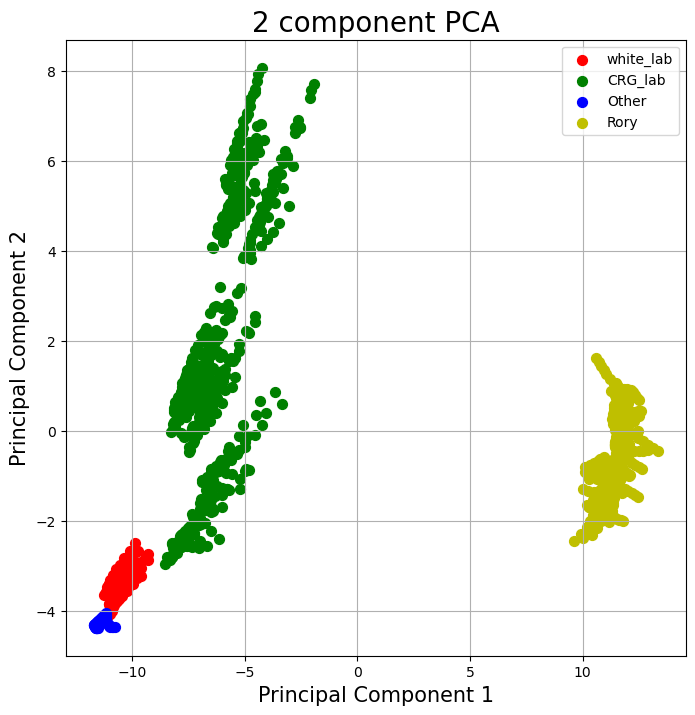

In [463]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# ax.set_ylim(-0.2,0.2)


targets = ['white_lab', 'CRG_lab','Other','Rory']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [464]:
# dataset_0 = norm_data[norm_data['Target'] == 0]
# dataset_1 = norm_data[norm_data['Target'] == 1]

# window = 100
# for i in range(5):
#     dataset_0 = dataset_0.rolling(window=window, axis=0, min_periods=1).mean()
#     dataset_1 =dataset_1.rolling(window=window, axis=0, min_periods=1).mean()

labels_0 = dataset_0.pop('Target')
labels_1 = dataset_1.pop('Target')
dataset_0.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
1218,0.077616+0.046015j,0.080100+0.046275j,0.081020+0.045056j,0.080585+0.042486j,0.079231+0.039165j,0.077399+0.035691j,0.075527+0.032663j,0.074054+0.030679j,0.072590+0.029882j,0.070711+0.029814j,...,-0.092522-0.066392j,-0.090363-0.063529j,-0.088048-0.060140j,-0.086371-0.056905j,-0.086127-0.054502j,-0.088109-0.053610j,-0.094459-0.054405j,-0.105498-0.056516j,-0.119287-0.059809j,-0.133888-0.064146j
1219,0.069553+0.028506j,0.073042+0.029385j,0.075793+0.029390j,0.076170+0.027504j,0.075216+0.024609j,0.073649+0.021500j,0.071794+0.018793j,0.069804+0.016996j,0.069028+0.016366j,0.067647+0.016321j,...,-0.095069-0.048638j,-0.093603-0.046530j,-0.091222-0.043529j,-0.089235-0.040583j,-0.088219-0.038345j,-0.088792-0.036797j,-0.093339-0.036663j,-0.102715-0.038808j,-0.115001-0.042355j,-0.128028-0.047024j
1220,0.060762+0.010286j,0.065495+0.011818j,0.069598+0.012818j,0.071827+0.012464j,0.071636+0.010409j,0.070245+0.007873j,0.068089+0.005742j,0.066080+0.004340j,0.064637+0.003386j,0.064436+0.003323j,...,-0.096012-0.029655j,-0.096362-0.029191j,-0.094595-0.027087j,-0.092142-0.024602j,-0.089998-0.022369j,-0.090389-0.020111j,-0.092888-0.018947j,-0.099055-0.020406j,-0.108788-0.024067j,-0.118945-0.029191j
1221,0.052121-0.008110j,0.057459-0.006149j,0.062166-0.004530j,0.065506-0.003667j,0.066458-0.004360j,0.065415-0.005889j,0.063890-0.006970j,0.062025-0.008054j,0.060136-0.009219j,0.058936-0.010183j,...,-0.096387-0.009937j,-0.095104-0.009970j,-0.094430-0.009306j,-0.091898-0.007657j,-0.090906-0.005472j,-0.090961-0.003255j,-0.091789-0.001925j,-0.094014-0.002540j,-0.099551-0.006129j,-0.105014-0.011773j
1222,0.043523-0.026111j,0.048929-0.023858j,0.053704-0.021904j,0.057215-0.020547j,0.058830-0.020088j,0.058631-0.020389j,0.057408-0.021060j,0.055593-0.022016j,0.053620-0.023171j,0.051921-0.024442j,...,-0.093105+0.010717j,-0.090880+0.010490j,-0.089160+0.010445j,-0.087840+0.011222j,-0.086701+0.012850j,-0.085886+0.014483j,-0.085539+0.015276j,-0.085805+0.014384j,-0.086828+0.010960j,-0.087365+0.004716j


In [465]:
sc = StandardScaler()

dataset_0 = np.abs(dataset_0)
dataset_1 = np.abs(dataset_1)
# dataset_0 = sc.fit_transform(dataset_0)
# dataset_1 = sc.fit_transform(dataset_1)

/home/torps/anaconda3/envs/mlenv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/torps/anaconda3/envs/mlenv/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


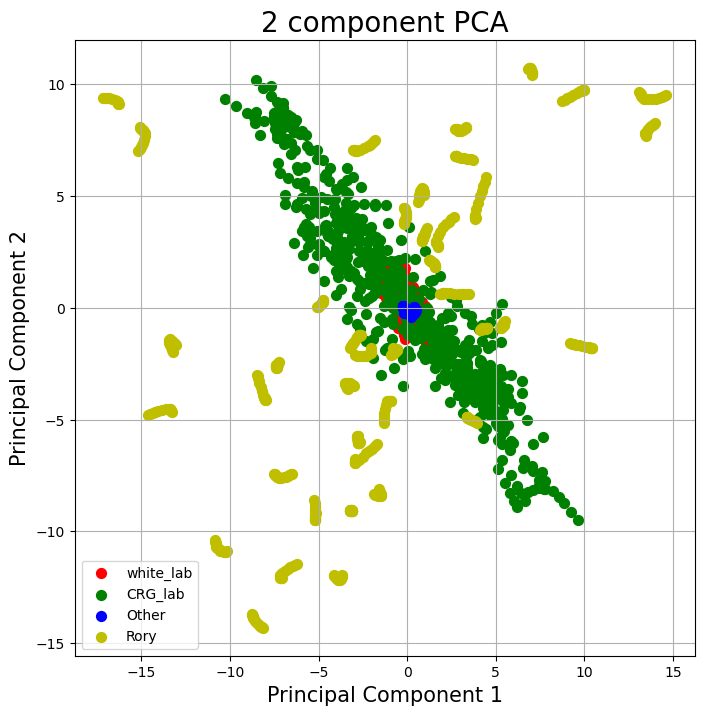

In [466]:
U_0, S_0, Vt_0 = svd(x,full_matrices=False)
svd_pca_0 = U_0 @ np.diag(S_0)

k=2
principal_components_0 = svd_pca_0[:, :k]


principal_df_0 = pd.DataFrame(principal_components_0, columns=[f"PC{i+1}" for i in range(k)])

principal_df_0 = pd.concat([principal_df_0, lab], axis = 1)

principal_df_0

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# ax.set_ylim(-0.2,0.2)


targets = ['white_lab', 'CRG_lab','Other','Rory']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = principal_df_0['Target'] == target
    ax.scatter(principal_df_0.loc[indicesToKeep, 'PC1']
               , principal_df_0.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

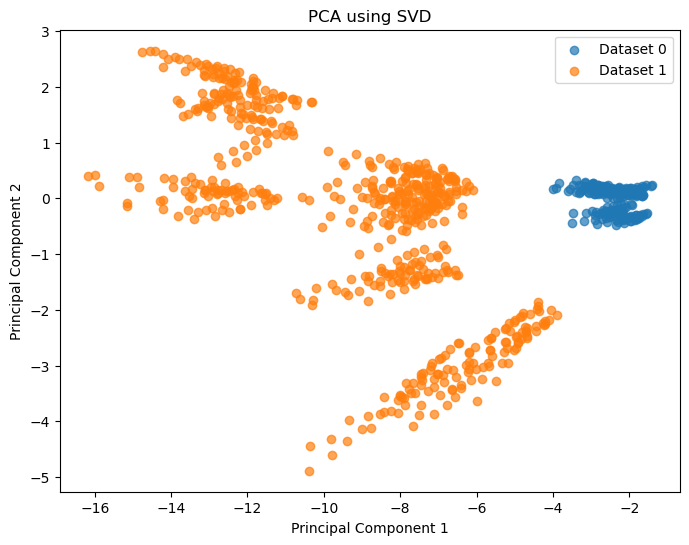

In [467]:
# SVD Analysis

# # Perform Singular Value Decomposition (SVD)
U_0, S_0, Vt_0 = svd(dataset_0, full_matrices=False)
U_1, S_1, Vt_1 = svd(dataset_1, full_matrices=False)

# Project the data onto the principal components (same as PCA)
svd_pca_0 = U_0 @ np.diag(S_0)  # Projection for dataset_0
svd_pca_1 = U_1 @ np.diag(S_1)  # Projection for dataset_1

# Select only the first k principal components (same as PCA reduction)
k = 2  # Number of principal components to retain
principal_components_0 = svd_pca_0[:, :k]
principal_components_1 = svd_pca_1[:, :k]

# Convert to DataFrame for visualization
principal_df_0 = pd.DataFrame(principal_components_0, columns=[f"PC{i+1}" for i in range(k)])
principal_df_1 = pd.DataFrame(principal_components_1, columns=[f"PC{i+1}" for i in range(k)])


# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df_0["PC1"], principal_df_0["PC2"], label="Dataset 0", alpha=0.7)
plt.scatter(principal_df_1["PC1"], principal_df_1["PC2"], label="Dataset 1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA using SVD")
plt.legend()
plt.show()


In [468]:
#PCA Analysis

# kpca = KernelPCA(n_components=2, kernel='rbf')  # Radial Basis Function kernel

# principal_components_0 = kpca.fit_transform(dataset_0)
# principal_components_1 = kpca.fit_transform(dataset_1)

# pca_label_0 = pd.DataFrame(data=principal_components_0, columns=['PC1', 'PC2'])
# pca_label_1 = pd.DataFrame(data=principal_components_1, columns=['PC1', 'PC2'])



# # Plot the PCA results
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_label_0['PC1'], pca_label_0['PC2'], label='Label 0', alpha=0.7)
# plt.scatter(pca_label_1['PC1'], pca_label_1['PC2'], label='Label 1', alpha=0.7)
# plt.title('PCA Analysis of Labels 0 and 1')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid()
# plt.show()
